In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
df=pd.read_csv("/content/Abnb_paris.csv")
df

,Unnamed: 0,reviews,savwish,logreviews,logsavwish,price,rating,accommodates,extpeop,min_stay,sentiment,secdep,cleanfee,weekfee,monthfee,bedroom,bathroom,beds,review_text
0,1,10,1277,1.041393,3.106531,185,4.5,3,1,5,3.208943,1,1,1,1,1,1,1,Even if i stayed at another apartment the stay...
1,2,8,279,0.954243,2.447158,100,5.0,2,0,3,2.245883,0,0,0,0,1,1,1,"Exactly what you can see on the pictures, plus..."
2,3,31,434,1.505150,2.638489,512,5.0,10,1,3,2.509137,1,0,1,1,4,3,5,We were five colleagues staying in Lea's apart...
3,4,65,784,1.819544,2.894870,92,4.5,2,0,2,2.864322,0,0,1,1,1,1,1,"It was perfect! The location is great, easy to..."
4,5,9,621,1.000000,2.793790,71,4.5,4,1,1,1.892305,1,1,0,0,2,1,1,"Saras flat is nice and clean, she was the perf..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,70,2,21,0.477121,1.342423,84,5.0,2,0,1,1.735375,0,1,0,0,1,1,1,This was my first time using airbnb and what a...
62,71,60,879,1.785330,2.944483,84,5.0,2,0,1,2.917489,1,1,1,1,1,1,1,"Phillipe, Thanks so much for the lovely stay. ..."
63,72,37,732,1.579784,2.865104,112,4.5,2,0,1,2.110690,1,1,1,1,1,1,1,We arrived late to Leece due to all trains bei...
64,74,27,508,1.447158,2.706718,128,4.5,3,1,1,2.882002,0,0,0,0,2,1,1,We really felt at home in the nicely decorated...


In [ ]:
df.columns

Index(['Unnamed: 0', 'reviews', 'savwish', 'logreviews', 'logsavwish', 'price',
       'rating', 'accommodates', 'extpeop', 'min_stay', 'sentiment', 'secdep',
       'cleanfee', 'weekfee', 'monthfee', 'bedroom', 'bathroom', 'beds',
       'review_text'],
      dtype='object')

In [ ]:
df.isnull().sum()

Unnamed: 0      0
reviews         0
savwish         0
logreviews      0
logsavwish      0
price           0
rating          0
accommodates    0
extpeop         0
min_stay        0
sentiment       0
secdep          0
cleanfee        0
weekfee         0
monthfee        0
bedroom         0
bathroom        0
beds            0
review_text     0
dtype: int64

In [ ]:
df.drop(['Unnamed: 0', 'logreviews', 'logsavwish'], axis=1, inplace=True)
df

,reviews,savwish,price,rating,accommodates,extpeop,min_stay,sentiment,secdep,cleanfee,weekfee,monthfee,bedroom,bathroom,beds,review_text
0,10,1277,185,4.5,3,1,5,3.208943,1,1,1,1,1,1,1,Even if i stayed at another apartment the stay...
1,8,279,100,5.0,2,0,3,2.245883,0,0,0,0,1,1,1,"Exactly what you can see on the pictures, plus..."
2,31,434,512,5.0,10,1,3,2.509137,1,0,1,1,4,3,5,We were five colleagues staying in Lea's apart...
3,65,784,92,4.5,2,0,2,2.864322,0,0,1,1,1,1,1,"It was perfect! The location is great, easy to..."
4,9,621,71,4.5,4,1,1,1.892305,1,1,0,0,2,1,1,"Saras flat is nice and clean, she was the perf..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,2,21,84,5.0,2,0,1,1.735375,0,1,0,0,1,1,1,This was my first time using airbnb and what a...
62,60,879,84,5.0,2,0,1,2.917489,1,1,1,1,1,1,1,"Phillipe, Thanks so much for the lovely stay. ..."
63,37,732,112,4.5,2,0,1,2.110690,1,1,1,1,1,1,1,We arrived late to Leece due to all trains bei...
64,27,508,128,4.5,3,1,1,2.882002,0,0,0,0,2,1,1,We really felt at home in the nicely decorated...


In [ ]:
stop_words = set(stopwords.words('english'))
# Convert sentiment values to binary labels
threshold = 2.5
df['sentiment'] = (df['sentiment'] > threshold).astype(int)

def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)
    # Removing punctuation and stop words
    filtered_tokens = [word.lower() for word in tokens if word.isalpha() and word.lower() not in stop_words]
    # Join the tokens back into text
    return ' '.join(filtered_tokens)

# Apply preprocessing to 'review_text' column
df['clean_text'] = df['review_text'].apply(preprocess_text)

# Convert text data into numerical features using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['clean_text'])
y = df['sentiment']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
base_models = {
    "Naive Bayes": MultinomialNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(kernel='linear')
}

In [ ]:
# Train individual base models
base_results = {}
for name, model in base_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    base_results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-score': f1_score(y_test, y_pred),
        'Confusion Matrix': confusion_matrix(y_test, y_pred)
    }



In [ ]:
# Ensemble methods
ensemble_models = [
    ("Random Forest", RandomForestClassifier()),
    ("AdaBoost", AdaBoostClassifier()),
    ("Voting Classifier", VotingClassifier(estimators=[('nb', base_models['Naive Bayes']),
                                                        ('dt', base_models['Decision Tree']),
                                                        ('svm', base_models['SVM'])], voting='hard'))
]

ensemble_results = {}
# Train ensemble models
for name, model in ensemble_models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    ensemble_results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-score': f1_score(y_test, y_pred),
        'Confusion Matrix': confusion_matrix(y_test, y_pred)
    }

In [ ]:
# Model Evaluation
# Print results
print("Base Models Results:")
for name, result in base_results.items():
    print(name)
    print(result)

print("\nEnsemble Models Results:")
for name, result in ensemble_results.items():
    print(name)
    print(result)

Base Models Results:
Naive Bayes
{'Accuracy': 0.7857142857142857, 'Precision': 0.6, 'Recall': 0.75, 'F1-score': 0.6666666666666665, 'Confusion Matrix': array([[8, 2],
       [1, 3]])}
Decision Tree
{'Accuracy': 0.6428571428571429, 'Precision': 0.4, 'Recall': 0.5, 'F1-score': 0.4444444444444445, 'Confusion Matrix': array([[7, 3],
       [2, 2]])}
SVM
{'Accuracy': 0.7857142857142857, 'Precision': 0.5714285714285714, 'Recall': 1.0, 'F1-score': 0.7272727272727273, 'Confusion Matrix': array([[7, 3],
       [0, 4]])}

Ensemble Models Results:
Random Forest
{'Accuracy': 0.7857142857142857, 'Precision': 0.6666666666666666, 'Recall': 0.5, 'F1-score': 0.5714285714285715, 'Confusion Matrix': array([[9, 1],
       [2, 2]])}
AdaBoost
{'Accuracy': 0.8571428571428571, 'Precision': 0.75, 'Recall': 0.75, 'F1-score': 0.75, 'Confusion Matrix': array([[9, 1],
       [1, 3]])}
Voting Classifier
{'Accuracy': 0.7857142857142857, 'Precision': 0.6, 'Recall': 0.75, 'F1-score': 0.6666666666666665, 'Confusion Mat

**Analysis**


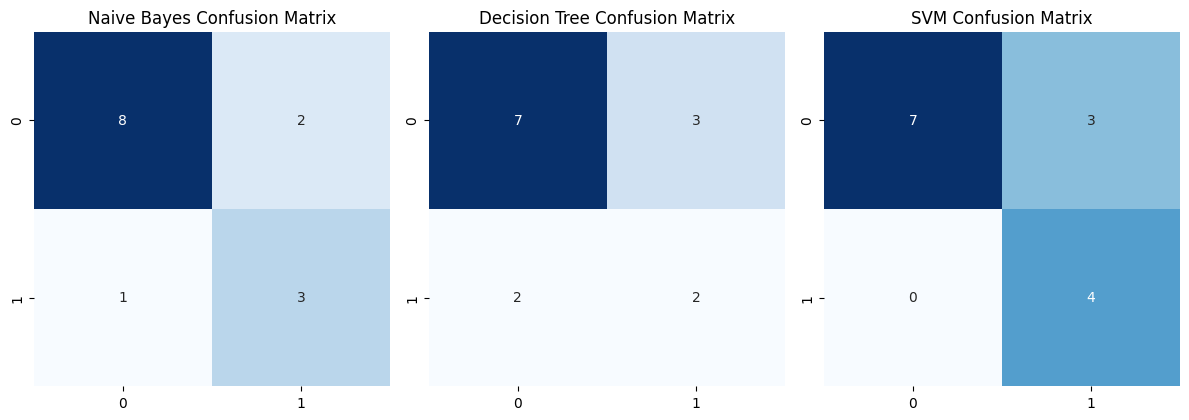

In [ ]:
# Visualize performance metrics using confusion matrix
plt.figure(figsize=(12, 8))
for i, (name, result) in enumerate(base_results.items()):
    plt.subplot(2, 3, i+1)
    sns.heatmap(result['Confusion Matrix'], annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"{name} Confusion Matrix")
plt.tight_layout()
plt.show()

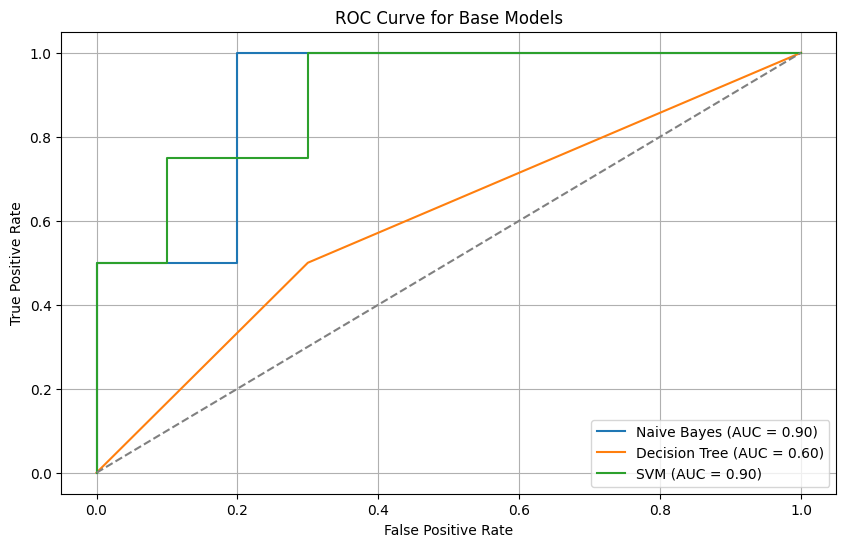

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Plot ROC curve for each base model
plt.figure(figsize=(10, 6))
for name, model in base_models.items():
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
    else:
        y_prob = model.decision_function(X_test)  # Use decision function for SVM
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Base Models')
plt.legend()
plt.grid(True)
plt.show()


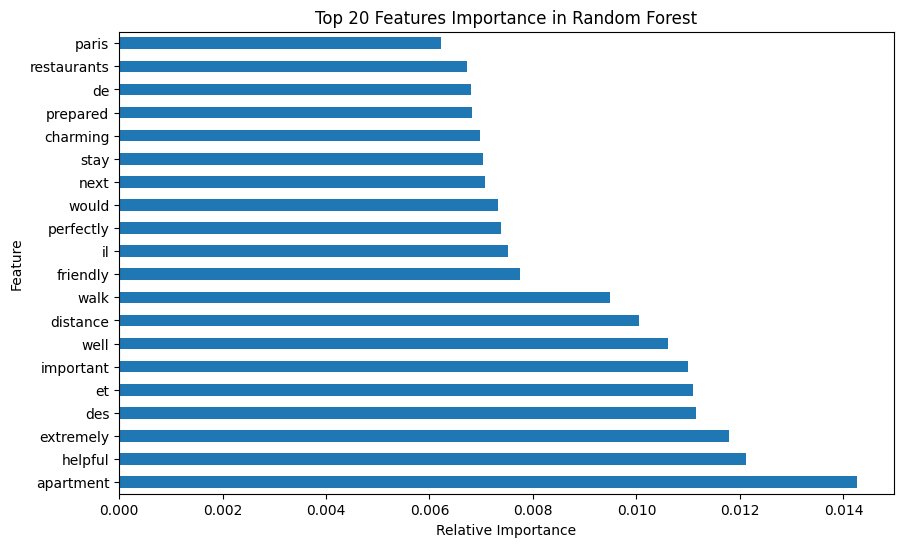

In [ ]:
# Random Forest feature importance
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

plt.figure(figsize=(10, 6))
feat_importances = pd.Series(rf_model.feature_importances_, index=vectorizer.get_feature_names_out())
feat_importances.nlargest(20).plot(kind='barh')
plt.xlabel('Relative Importance')
plt.ylabel('Feature')
plt.title('Top 20 Features Importance in Random Forest')
plt.show()


<Figure size 1000x600 with 0 Axes>

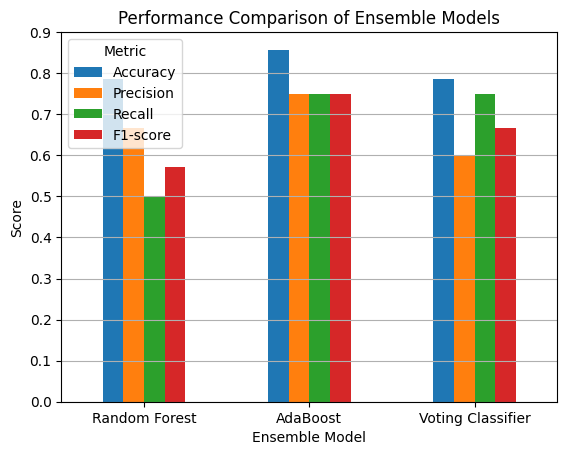

In [ ]:
# Ensemble model comparison
ensemble_metrics = pd.DataFrame(ensemble_results).T.drop(columns='Confusion Matrix')

plt.figure(figsize=(10, 6))
ensemble_metrics.plot(kind='bar', rot=0)
plt.xlabel('Ensemble Model')
plt.ylabel('Score')
plt.title('Performance Comparison of Ensemble Models')
plt.legend(title='Metric')
plt.grid(axis='y')
plt.show()


**Analysis**:

Among the base models, SVM achieved the highest recall of 100%, indicating that it correctly identified all positive sentiment instances. However, Decision Tree had the lowest overall performance with the lowest accuracy, precision, recall, and F1-score.
Ensemble methods, particularly AdaBoost, showed improved performance compared to individual base models. AdaBoost achieved the highest accuracy, precision, recall, and F1-score among all models, indicating its effectiveness in sentiment analysis.
The Voting Classifier produced similar results to Naive Bayes, which suggests that the combination of Naive Bayes, Decision Tree, and SVM didn't significantly enhance the performance compared to using Naive Bayes alone.

**Recommendations**:

Based on these results, AdaBoost appears to be the most effective model for sentiment analysis in this dataset. It balances precision and recall well and achieves the highest overall accuracy.
Further tuning and optimization of the models, such as hyperparameter tuning, feature engineering, or trying different ensemble techniques, could potentially improve the performance further.

1.**Improving User Experience**:

The Airbnb marketing team could enhance users' experience by providing personalized property recommendations based on sentiment analysis of reviews. By ranking properties according to positive sentiment, users are more likely to book accommodations that align with their preferences and expectations.
Review sentiment could provide valuable insights into guests' overall satisfaction and perception of properties. While summary-rating values offer a general indication of property quality, sentiment analysis delves deeper into guests' experiences and emotions. Therefore, incorporating review sentiment alongside summary ratings can offer a more comprehensive understanding of property quality and help improve user decision-making.
In terms of predicting revenues, review sentiment may provide a more nuanced understanding of guests' satisfaction levels and their likelihood to return or recommend the property to others. While summary-rating values contribute to revenue prediction by indicating overall property quality, review sentiment adds granularity by capturing guests' subjective experiences, which can influence booking decisions and repeat bookings.

2. **Region-Specific Strategy**:

Considering the performance of properties in Miami and Paris, Airbnb could benefit from a region-specific strategy tailored to each location's unique characteristics and market dynamics. The analysis of sentiment analysis results can help identify factors contributing to guests' satisfaction or dissatisfaction in each region.
A region-specific strategy would enable Airbnb to address specific needs and preferences of guests in Miami and Paris, potentially leading to higher guest satisfaction and increased bookings. For example, in Miami, properties with amenities such as beach access or proximity to nightlife hotspots may attract more guests, while in Paris, properties near popular tourist attractions or offering authentic local experiences may be in higher demand.
Airbnb could also suggest optimal pricing strategies for hosts based on market demand, seasonality, and competitive analysis in each region. By analyzing sentiment trends and booking patterns, Airbnb can help hosts adjust pricing to maximize earnings while remaining competitive in their respective markets.
Additionally, Airbnb could offer recommendations to hosts on ways to improve overall earnings, such as enhancing property amenities, providing exceptional guest experiences, and leveraging positive guest feedback to attract more bookings and increase occupancy rates.